<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Enrichment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) GO enrichment analysis**

In [2]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("clusterProfiler")

library(clusterProfiler)
data(geneList, package="DOSE")
gene <- names(geneList)[abs(geneList) > 2]

# Entrez gene ID
head(gene)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘zlibbioc’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘formatR’, ‘XVector’, ‘GenomeInfoDb’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘BiocParallel’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘scatterpie’, ‘ggtree’, ‘R.utils’, ‘AnnotationD

[1] "4312"  "8318"  "10874" "55143" "55388" "991"

In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db") # Install the missing package


library(clusterProfiler)
library(org.Hs.eg.db) # Load the library
data(geneList, package="DOSE")
gene <- names(geneList)[abs(geneList) > 2]

# Entrez gene ID
head(gene)

ggo <- groupGO(gene     = gene,
               OrgDb    = org.Hs.eg.db,
               ont      = "CC",
               level    = 3,
               readable = TRUE)

head(ggo)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler'”
Old packages: 'data.table', 'processx'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'org.Hs.eg.db'

Old packages: 'data.table', 'processx'

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:


[1] "4312"  "8318"  "10874" "55143" "55388" "991"

,ID,Description,Count,GeneRatio,geneID
,<chr>,<chr>,<int>,<chr>,<chr>
GO:0000133,GO:0000133,polarisome,0,0/207,
GO:0000417,GO:0000417,HIR complex,0,0/207,
GO:0000796,GO:0000796,condensin complex,2,2/207,NCAPH/NCAPG
GO:0000808,GO:0000808,origin recognition complex,0,0/207,
GO:0000930,GO:0000930,gamma-tubulin complex,0,0/207,
GO:0000939,GO:0000939,inner kinetochore,2,2/207,CENPM/CENPN


**1.1 GO over-representation analysis**

In [5]:
ego <- enrichGO(gene          = gene,
                universe      = names(geneList),
                OrgDb         = org.Hs.eg.db,
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)
head(ego)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0000775,GO:0000775,"chromosome, centromeric region",21/201,199/11919,0.10552764,6.257631,9.795483,1.849874e-11,5.272141e-09,4.829145e-09,CDCA8/CDC20/CENPE/NDC80/TOP2A/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/EZH2/TTK/NCAPG/AURKB/AURKA/CCNB1,21
GO:0000779,GO:0000779,"condensed chromosome, centromeric region",18/201,148/11919,0.12162162,7.211981,9.959264,5.132324e-11,5.985415e-09,5.482485e-09,CDC20/CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/NCAPG/AURKB/AURKA/CCNB1,18
GO:0072686,GO:0072686,mitotic spindle,18/201,152/11919,0.11842105,7.022192,9.786254,8.053824e-11,5.985415e-09,5.482485e-09,KIF23/CENPE/ASPM/DLGAP5/SKA1/NUSAP1/TPX2/TACC3/CDK1/MAD2L1/KIF18A/KIF11/TRAT1/AURKB/PRC1/KIFC1/KIF18B/AURKA,18
GO:0005819,GO:0005819,spindle,26/201,338/11919,0.07692308,4.561424,8.699252,8.806167e-11,5.985415e-09,5.482485e-09,CDCA8/CDC20/KIF23/CENPE/ASPM/DLGAP5/SKA1/NUSAP1/TPX2/TACC3/NEK2/CDK1/MAD2L1/KIF18A/BIRC5/KIF11/TRAT1/TTK/AURKB/PRC1/KIFC1/KIF18B/KIF20A/AURKA/CCNB1/KIF4A,26
GO:0000793,GO:0000793,condensed chromosome,21/201,219/11919,0.09589041,5.686158,9.166827,1.142683e-10,5.985415e-09,5.482485e-09,CDC20/CENPE/NDC80/TOP2A/NCAPH/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/NCAPG/AURKB/CHEK1/AURKA/CCNB1,21
GO:0098687,GO:0098687,chromosomal region,25/201,319/11919,0.07836991,4.647218,8.647710,1.406548e-10,5.985415e-09,5.482485e-09,CDCA8/CDC20/CENPE/NDC80/TOP2A/HJURP/SKA1/NEK2/CENPM/RAD51AP1/CENPN/CDK1/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/EZH2/TTK/NCAPG/AURKB/CHEK1/AURKA/CCNB1/MCM5,25


In [6]:
gene.df <- bitr(gene, fromType = "ENTREZID",
        toType = c("ENSEMBL", "SYMBOL"),
        OrgDb = org.Hs.eg.db)

ego2 <- enrichGO(gene         = gene.df$ENSEMBL,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)
head(ego2, 3)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(gene, fromType = "ENTREZID", toType = c("ENSEMBL", "SYMBOL"), :
“0.48% of input gene IDs are fail to map...”


,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0072686,GO:0072686,mitotic spindle,22/237,211/22654,0.10426540,9.966365,13.45443,6.902090e-16,1.842858e-13,1.409479e-13,ENSG00000137807/ENSG00000138778/ENSG00000066279/ENSG00000126787/ENSG00000154839/ENSG00000262634/ENSG00000137804/ENSG00000088325/ENSG00000013810/ENSG00000170312/ENSG00000164109/ENSG00000121621/ENSG00000138160/ENSG00000163519/ENSG00000178999/ENSG00000198901/ENSG00000237649/ENSG00000233450/ENSG00000056678/ENSG00000204197/ENSG00000186185/ENSG00000087586,22
GO:0005819,GO:0005819,spindle,30/237,476/22654,0.06302521,6.024359,11.39125,3.371853e-15,4.501424e-13,3.442840e-13,ENSG00000134690/ENSG00000117399/ENSG00000137807/ENSG00000138778/ENSG00000066279/ENSG00000126787/ENSG00000154839/ENSG00000262634/ENSG00000137804/ENSG00000088325/ENSG00000013810/ENSG00000117650/ENSG00000170312/ENSG00000164109/ENSG00000121621/ENSG00000089685/ENSG00000138160/ENSG00000163519/ENSG00000112742/ENSG00000178999/ENSG00000198901/ENSG00000237649/ENSG00000233450/ENSG00000056678/ENSG00000204197/ENSG00000186185/ENSG00000112984/ENSG00000087586/ENSG00000134057/ENSG00000090889,30
GO:0000775,GO:0000775,"chromosome, centromeric region",23/237,283/22654,0.08127208,7.768514,11.78127,3.349658e-14,2.246302e-12,1.718047e-12,ENSG00000134690/ENSG00000117399/ENSG00000138778/ENSG00000080986/ENSG00000131747/ENSG00000123485/ENSG00000154839/ENSG00000262634/ENSG00000117650/ENSG00000100162/ENSG00000166451/ENSG00000291964/ENSG00000186871/ENSG00000164109/ENSG00000121621/ENSG00000167513/ENSG00000089685/ENSG00000106462/ENSG00000112742/ENSG00000109805/ENSG00000178999/ENSG00000087586/ENSG00000134057,23


**1.2 GO Gene Set Enrichment Analysis**

In [8]:
ego3 <- gseGO(geneList     = geneList,
              OrgDb        = org.Hs.eg.db,
              ont          = "CC",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


**1.3 Visualize enriched GO terms as a directed acyclic graph**

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'ggarchery'

Old packages: 'data.table', 'processx'



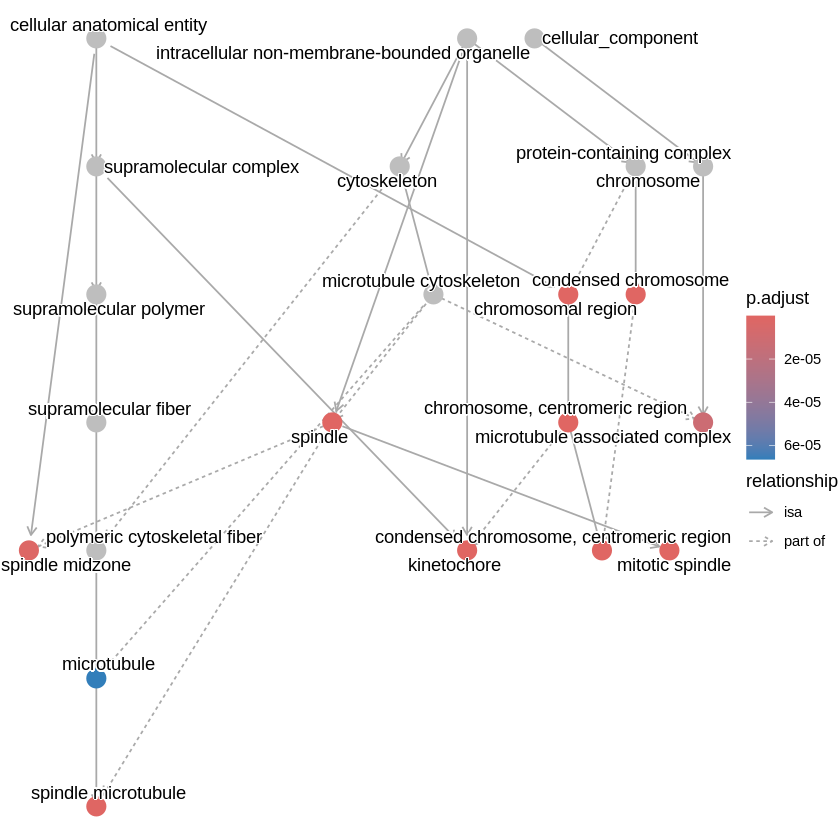

In [10]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ggarchery") # Install the ggarchery package

library(ggarchery) # Load the ggarchery library

# ... your existing code ...

goplot(ego)

# **2) KEGG enrichment analysis**

In [11]:
library(clusterProfiler)
search_kegg_organism('ece', by='kegg_code')

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
923,ece,Escherichia coli O157:H7 EDL933,EHEC
5605,ecec,Enterococcus cecorum,Enterococcus cecorum


In [12]:
ecoli <- search_kegg_organism('Escherichia coli', by='scientific_name')
dim(ecoli)

[1] 65  3

In [13]:
head(ecoli)

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
918,eco,Escherichia coli K-12 MG1655,Escherichia coli K-12 MG1655
919,ecj,Escherichia coli K-12 W3110,Escherichia coli K-12 W3110
920,ecd,Escherichia coli K-12 DH10B,Escherichia coli K-12 DH10B
921,ebw,Escherichia coli K-12 BW2952,Escherichia coli K-12 BW2952
922,ecok,Escherichia coli K-12 MDS42,Escherichia coli K-12 MDS42
923,ece,Escherichia coli O157:H7 EDL933,EHEC


**2.1 KEGG pathway over-representation analysis**

In [14]:
data(geneList, package="DOSE")
gene <- names(geneList)[abs(geneList) > 2]

kk <- enrichKEGG(gene         = gene,
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)
head(kk)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04110,Cellular Processes,Cell growth and death,hsa04110,Cell cycle,15/106,158/8541,0.09493671,7.649570,9.457181,7.923261e-10,1.719348e-07,1.701416e-07,8318/991/9133/10403/890/983/4085/81620/7272/9212/1111/9319/891/4174/9232,15
hsa04114,Cellular Processes,Cell growth and death,hsa04114,Oocyte meiosis,10/106,139/8541,0.07194245,5.796797,6.391557,7.942932e-06,8.618081e-04,8.528200e-04,991/9133/983/4085/51806/6790/891/9232/3708/5241,10
hsa04218,Cellular Processes,Cell growth and death,hsa04218,Cellular senescence,10/106,157/8541,0.06369427,5.132196,5.857933,2.318389e-05,1.676968e-03,1.659478e-03,2305/4605/9133/890/983/51806/1111/891/776/3708,10
hsa04061,Environmental Information Processing,Signaling molecules and interaction,hsa04061,Viral protein interaction with cytokine and cytokine receptor,8/106,100/8541,0.08000000,6.446038,6.140773,3.123248e-05,1.694362e-03,1.676691e-03,3627/10563/6373/4283/6362/6355/9547/1524,8
hsa03320,Organismal Systems,Endocrine system,hsa03320,PPAR signaling pathway,7/106,76/8541,0.09210526,7.421425,6.303243,4.022099e-05,1.745591e-03,1.727386e-03,4312/9415/9370/5105/2167/3158/5346,7
hsa04814,Cellular Processes,Cell motility,hsa04814,Motor proteins,10/106,197/8541,0.05076142,4.090125,4.918825,1.578522e-04,5.708990e-03,5.649449e-03,9493/1062/81930/3832/3833/146909/10112/24137/4629/7802,10


**2.2 KEGG pathway gene set enrichment analysis**

In [15]:
kk2 <- gseKEGG(geneList     = geneList,
               organism     = 'hsa',
               minGSSize    = 120,
               pvalueCutoff = 0.05,
               verbose      = FALSE)
head(kk2)

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa04110,hsa04110,Cell cycle,139,0.6637551,2.817346,1.000000e-10,8.200000e-09,5.263158e-09,1155,"tags=36%, list=9%, signal=33%",8318/991/9133/10403/890/983/4085/81620/7272/9212/1111/9319/891/4174/9232/4171/993/990/5347/701/9700/898/23594/4998/9134/4175/4173/10926/6502/994/699/4609/5111/26271/1869/1029/8317/4176/2810/3066/1871/1031/9088/995/1019/4172/5885/11200/7027/1875
hsa05169,hsa05169,Epstein-Barr virus infection,194,0.4318484,1.894776,1.287698e-07,5.279562e-06,3.388679e-06,2820,"tags=39%, list=23%, signal=31%",3627/890/6890/9636/898/9134/6502/6772/3126/3112/4609/917/5709/1869/3654/919/915/4067/4938/864/4940/5713/5336/11047/3066/54205/1871/578/1019/637/916/3383/4939/10213/23586/4793/5603/7979/7128/6891/930/5714/3452/6850/5702/4794/7124/3569/7097/5708/2208/8772/3119/5704/7186/5971/3135/1380/958/5610/4792/10018/8819/3134/10379/9641/1147/5718/6300/3109/811/5606/2923/3108/5707/1432
hsa04613,hsa04613,Neutrophil extracellular trap formation,130,0.4496569,1.892366,6.694499e-06,1.372372e-04,8.808551e-05,2575,"tags=37%, list=21%, signal=30%",820/366/51311/64581/3015/85236/55506/8970/8357/1535/2359/5336/4688/92815/3066/8336/292/1991/3689/8345/5603/4689/5880/10105/1184/6404/3018/6850/5604/3014/7097/1378/8290/1536/834/5605/1183/728/2215/8335/5594/9734/3674/5578/5582/7417/8331/6300
hsa05166,hsa05166,Human T-cell leukemia virus 1 infection,203,0.3882567,1.728353,5.643741e-06,1.372372e-04,8.808551e-05,1955,"tags=26%, list=16%, signal=22%",991/9133/890/4085/7850/1111/9232/8061/701/9700/898/4316/9134/3932/3559/3126/3112/4609/3561/917/1869/1029/915/114/2005/5902/55697/1871/1031/2224/292/1019/3689/916/3383/11200/706/3600/6513/3601/468/5604/7124/1030/3569/4049/4055/10393/3119/5901/5971/1959/3135
hsa04510,hsa04510,Focal adhesion,191,-0.4199193,-1.719500,4.263504e-05,6.992147e-04,4.487899e-04,2183,"tags=27%, list=17%, signal=23%",5595/5228/7424/1499/4636/83660/2013/7059/5295/1288/23396/3910/3371/3082/1291/394/3791/7450/596/3685/1280/3675/595/3912/1793/2012/1278/1277/1293/10398/55742/2317/7058/25759/56034/3693/3480/5159/857/1292/3908/3909/63923/3913/1287/3679/7060/3479/10451/80310/1311/1101
hsa04060,hsa04060,Cytokine-cytokine receptor interaction,251,0.3393792,1.552836,7.325999e-05,1.001220e-03,6.426315e-04,2609,"tags=33%, list=21%, signal=27%",3627/10563/6373/4283/6362/7850/6355/2921/6364/3595/3576/8792/6352/10663/3559/1230/6347/3561/6351/1237/1236/8200/11009/4050/3574/3575/6354/608/3458/959/27242/50615/1439/9235/6361/1234/9466/6367/6375/6374/3600/2919/8807/939/6360/10220/10148/3467/6357/3452/3601/64109/7124/29949/3569/4049/7852/4055/8808/3556/6376/3596/7293/2833/655/356/7133/958/1438/3587/6356/56300/3570/3578/3593/3558/2829/729230/3623/1232/3592/3560/3589


**2.3 KEGG module over-representation analysis**

In [16]:
mkk <- enrichMKEGG(gene = gene,
                   organism = 'hsa',
                   pvalueCutoff = 1,
                   qvalueCutoff = 1)
head(mkk)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/module"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/module"...



,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
M00912,M00912,"NAD biosynthesis, tryptophan => quinolinate => NAD",2/9,12/877,0.16666667,16.240741,5.410060,0.005863129,0.03517878,0.03085857,23475/3620,2
M00095,M00095,"C5 isoprenoid biosynthesis, mevalonate pathway",1/9,10/877,0.10000000,9.744444,2.830324,0.098494108,0.17966381,0.15759983,3158,1
M00053,M00053,"Deoxyribonucleotide biosynthesis, ADP/GDP/CDP/UDP => dATP/dGTP/dCTP/dUTP",1/9,11/877,0.09090909,8.858586,2.669287,0.107852300,0.17966381,0.15759983,6241,1
M00938,M00938,"Pyrimidine deoxyribonucleotide biosynthesis, UDP => dTTP",1/9,14/877,0.07142857,6.960317,2.287923,0.135410973,0.17966381,0.15759983,6241,1
M00003,M00003,"Gluconeogenesis, oxaloacetate => fructose-6P",1/9,18/877,0.05555556,5.413580,1.925503,0.170977893,0.17966381,0.15759983,5105,1
M00049,M00049,"Adenine ribonucleotide biosynthesis, IMP => ADP,ATP",1/9,19/877,0.05263158,5.128655,1.851634,0.179663806,0.17966381,0.15759983,26289,1


**2.4 KEGG module gene set enrichment analysis**

In [17]:
mkk2 <- gseMKEGG(geneList = geneList,
                 organism = 'hsa',
                 pvalueCutoff = 1)
head(mkk2)

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...

--> Not a KEGG enrichment result



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
M00001,M00001,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate",24,0.5739036,1.751445,0.006365433,0.2164247,0.2077141,2886,"tags=54%, list=23%, signal=42%",5214/3101/2821/7167/2597/5230/2023/5223/5315/3099/5232/2027/5211
M00938,M00938,"Pyrimidine deoxyribonucleotide biosynthesis, UDP => dTTP",10,0.6648004,1.595805,0.042704178,0.5227511,0.5017116,648,"tags=40%, list=5%, signal=38%",6241/7298/4830/1841
M00002,M00002,"Glycolysis, core module involving three-carbon compounds",11,0.6421781,1.587958,0.046125097,0.5227511,0.5017116,1381,"tags=55%, list=11%, signal=49%",7167/2597/5230/2023/5223/5315
M00035,M00035,Methionine degradation,11,0.5824213,1.440193,0.105386417,0.7069081,0.6784567,1555,"tags=45%, list=12%, signal=40%",875/1789/191/1788/1786
M00101,M00101,"Cholesterol biosynthesis, FPP => cholesterol",12,0.5350938,1.353105,0.150684932,0.7069081,0.6784567,1180,"tags=42%, list=9%, signal=38%",1717/6713/3930/10682/50814
M00104,M00104,"Bile acid biosynthesis, cholesterol => cholate/chenodeoxycholate",10,-0.5876900,-1.341773,0.149305556,0.7069081,0.6784567,961,"tags=50%, list=8%, signal=46%",6342/10998/1581/3295/8309


**2.5 Visualize enriched KEGG pathways**

In [18]:
browseKEGG(kk, 'hsa04110')

In [20]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("pathview") # Install the pathview package

library("pathview") # Now you can load the library
hsa04110 <- pathview(gene.data  = geneList,
                     pathway.id = "hsa04110",
                     species    = "hsa",
                     limit      = list(gene=max(abs(geneList)), cpd=1))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'pathview'

also installing the dependencies ‘bitops’, ‘RCurl’, ‘KEGGgraph’, ‘XML’, ‘Rgraphviz’, ‘graph’


Old packages: 'data.table', 'processx'

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp

# **3) WikiPathways analysis**

In [21]:
get_wp_organisms()

[1] "Anopheles gambiae"        "Arabidopsis thaliana"    
 [3] "Bos taurus"               "Caenorhabditis elegans"  
 [5] "Canis familiaris"         "Danio rerio"             
 [7] "Drosophila melanogaster"  "Equus caballus"          
 [9] "Gallus gallus"            "Homo sapiens"            
[11] "Mus musculus"             "Pan troglodytes"         
[13] "Populus trichocarpa"      "Rattus norvegicus"       
[15] "Saccharomyces cerevisiae" "Solanum lycopersicum"    
[17] "Sus scrofa"               "Zea mays"

**3.1 WikiPathways over-representation analysis**

In [22]:
data(geneList, package="DOSE")
gene <- names(geneList)[abs(geneList) > 2]

enrichWP(gene, organism = "Homo sapiens")

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 WikiPathways 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:207] "4312" "8318" "10874" "55143" "55388" "991" "6280" "2305" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...7 enriched terms found
'data.frame':	7 obs. of  12 variables:
 $ ID            : chr  "WP2446" "WP2361" "WP3942" "WP179" ...
 $ Description   : chr  "Retinoblastoma gene in cancer" "Gastric cancer network 1" "PPAR signaling" "Cell cycle" ...
 $ GeneRatio     : chr  "11/121" "6/121" "7/121" "10/121" ...
 $ BgRatio       : chr  "89/8836" "29/8836" "50/8836" "120/8836" ...
 $ RichFactor    : num  0.1236 0.2069 0.14 0.0833 0.2857 ...
 $ FoldEnrichment: num  9.03 15.11 10.22 6.09 20.86 ...
 $ zScore        : num  8.97 8.97 7.71 6.61 8.76 ...
 $ pvalue        : num  2.98e-08 2.14e-06 4.65e-06 5.21e-06 3.01e-05 ...
 $ p.adjust      : num  9.47e-06 3.40e-04 4.14e-04 4.14e-04 1.92e-03 ...
 $ qvalue        : num  8.69e-06 3.12e-04 3.80e-04 3.80e-

**3.2 WikiPathways gene set enrichment analysis**

In [23]:
gseWP(geneList, organism = "Homo sapiens")

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



#
# Gene Set Enrichment Analysis
#
#...@organism 	 Homo sapiens 
#...@setType 	 WikiPathways 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:12495] 4.57 4.51 4.42 4.14 3.88 ...
 - attr(*, "names")= chr [1:12495] "4312" "8318" "10874" "55143" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...80 enriched terms found
'data.frame':	80 obs. of  11 variables:
 $ ID             : chr  "WP2446" "WP179" "WP466" "WP45" ...
 $ Description    : chr  "Retinoblastoma gene in cancer" "Cell cycle" "DNA replication" "G1 to S cell cycle control" ...
 $ setSize        : int  84 111 42 62 231 23 102 77 41 61 ...
 $ enrichmentScore: num  0.731 0.663 0.792 0.665 0.445 ...
 $ NES            : num  2.9 2.75 2.73 2.47 2.02 ...
 $ pvalue         : num  1.00e-10 1.00e-10 1.00e-10 3.99e-10 2.11e-09 ...
 $ p.adjust       : num  2.42e-08 2.42e-08 2.42e-08 7.23e-08 3.06e-07 ...
 $ qvalue         : num  2.01e-08 2.01e-08 2.01e-08 6.03e-08 2.55e-07 ...
 $ rank           : num  1333 1234 1002 

# **4) Reactome enrichment analysis**

**4.1 Reactome pathway over-representation analysis**

In [25]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ReactomePA") # Install ReactomePA package

library(ReactomePA) # Load ReactomePA package

data(geneList, package="DOSE")
de <- names(geneList)[abs(geneList) > 1.5]
head(de)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'ReactomePA'

also installing the dependencies ‘gridExtra’, ‘RcppArmadillo’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ggraph’, ‘reactome.db’, ‘graphite’


Old packages: 'data.table', 'processx'

ReactomePA v1.50.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
reactome pathway analysis and visualization. Molecular BioSystems.
2016, 12(2):477-479



[1] "4312"  "8318"  "10874" "55143" "55388" "991"

In [26]:
x <- enrichPathway(gene=de, pvalueCutoff = 0.05, readable=TRUE)
head(x)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-69620,R-HSA-69620,Cell Cycle Checkpoints,38/338,292/11146,0.1301370,4.291440,10.078786,2.005501e-14,1.688632e-11,1.515737e-11,CDC45/CDCA8/MCM10/CDC20/CENPE/CCNB2/NDC80/UBE2C/SKA1/CENPM/CENPN/UBE2S/CCNA2/CDK1/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/CHEK1/CCNB1/MCM5/MCM2/KIF2C/CDC25A/CDC6/PLK1/BUB1B/GTSE1/EXO1/ZWINT/CENPU/SPC25/CENPI/CCNE1/ORC6/ORC1/TAOK1,38
R-HSA-69618,R-HSA-69618,Mitotic Spindle Checkpoint,22/338,112/11146,0.1964286,6.477494,10.302678,1.994474e-12,8.396736e-10,7.537013e-10,CDCA8/CDC20/CENPE/NDC80/UBE2C/SKA1/CENPM/CENPN/UBE2S/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/CENPI/TAOK1,22
R-HSA-2500257,R-HSA-2500257,Resolution of Sister Chromatid Cohesion,23/338,127/11146,0.1811024,5.972092,9.965420,3.693147e-12,1.036543e-09,9.304139e-10,CDCA8/CDC20/CENPE/CCNB2/NDC80/SKA1/CENPM/CENPN/CDK1/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/CCNB1/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/CENPI/TAOK1,23
R-HSA-141424,R-HSA-141424,Amplification of signal from the kinetochores,20/338,96/11146,0.2083333,6.870069,10.214648,6.571903e-12,1.106708e-09,9.933950e-10,CDCA8/CDC20/CENPE/NDC80/SKA1/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/CENPI/TAOK1,20
R-HSA-141444,R-HSA-141444,Amplification of signal from unattached kinetochores via a MAD2 inhibitory signal,20/338,96/11146,0.2083333,6.870069,10.214648,6.571903e-12,1.106708e-09,9.933950e-10,CDCA8/CDC20/CENPE/NDC80/SKA1/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/CENPI/TAOK1,20
R-HSA-9648025,R-HSA-9648025,EML4 and NUDC in mitotic spindle formation,20/338,117/11146,0.1709402,5.636980,8.916323,2.886522e-10,4.050752e-08,3.636004e-08,CDCA8/CDC20/CENPE/NDC80/SKA1/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/BIRC5/AURKB/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/CENPI/TAOK1,20


**4.2 Reactome pathway gene set enrichment analysis**

In [27]:
y <- gsePathway(geneList,
                pvalueCutoff = 0.2,
                pAdjustMethod = "BH",
                verbose = FALSE)
head(y)

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
R-HSA-69620,R-HSA-69620,Cell Cycle Checkpoints,237,0.6678105,3.065440,1e-10,4.266667e-09,3.160819e-09,1905,"tags=43%, list=15%, signal=37%",8318/55143/55388/991/1062/9133/10403/11065/220134/79019/55839/27338/890/983/54821/4085/81930/332/9212/1111/891/4174/4171/11004/993/990/5347/701/51512/9156/11130/79682/57405/2491/898/23594/4998/9134/4175/4173/10926/5984/1058/699/1063/85236/5688/5709/55055/641/1029/5698/1763/8970/5693/8317/4176/5713/79980/5982/9735/5721/2810/5691/9088/995/5685/7468/4172/7336/5690/5684/83990/5686/5695/11200/10213/8345/7534/80010/23198/5983/7979/54908/6396/4683/63967/3018/5699/5714/5702/3014/5905/3619/5708/55166/5692/10393/8290/5704/580/6119
R-HSA-453279,R-HSA-453279,Mitotic G1 phase and G1/S transition,142,0.7016040,3.029618,1e-10,4.266667e-09,3.160819e-09,1155,"tags=41%, list=9%, signal=37%",8318/55388/4605/7153/6241/890/983/81620/891/4174/4171/993/990/7083/898/23594/4998/1163/9134/4175/4173/10926/6502/7298/4609/5111/28227/5688/5709/26271/51053/1869/1029/5698/1719/4067/5693/8317/5427/23649/4176/5713/5557/5721/5691/1871/1031/5685/1019/5558/4172/5690/5684/5686/5695/7027/10213/1875
R-HSA-69239,R-HSA-69239,Synthesis of DNA,110,0.7124186,2.991034,1e-10,4.266667e-09,3.160819e-09,1905,"tags=54%, list=15%, signal=46%",8318/11065/27338/890/9837/81620/51659/4174/4171/990/898/23594/4998/9134/4175/4173/2237/6502/5984/84296/5111/5688/64785/5709/51053/5698/1763/5693/5427/23649/4176/5713/5982/5557/5721/5691/5685/5558/4172/5424/5690/5684/5686/5695/10213/23198/5983/7979/5699/5714/5702/9978/5425/5708/5692/10393/54107/5704/6119
R-HSA-69206,R-HSA-69206,G1/S Transition,124,0.7046866,2.989336,1e-10,4.266667e-09,3.160819e-09,1155,"tags=42%, list=9%, signal=38%",8318/55388/6241/890/983/81620/891/4174/4171/993/990/7083/898/23594/4998/1163/9134/4175/4173/10926/6502/7298/4609/5111/28227/5688/5709/26271/51053/1869/5698/1719/5693/8317/5427/23649/4176/5713/5557/5721/5691/5685/1019/5558/4172/5690/5684/5686/5695/7027/10213/1875
R-HSA-69278,R-HSA-69278,"Cell Cycle, Mitotic",458,0.6071739,2.967370,1e-10,4.266667e-09,3.160819e-09,1769,"tags=36%, list=14%, signal=32%",8318/55143/55388/991/2305/9493/1062/4605/9133/10403/7153/23397/6241/11065/220134/22974/4751/79019/55839/27338/890/983/54821/4085/9837/81930/81620/332/64151/9212/51659/10112/6790/891/4174/9232/4001/4171/3161/11004/993/990/5347/701/51512/11130/79682/57405/2491/9700/7083/898/23594/4998/10733/1163/54801/9134/4175/4173/2237/10926/6502/5984/994/9918/7298/1058/84296/699/4609/1063/85236/5111/28227/5688/9688/64785/5709/26271/55055/51053/1869/1029/5698/1763/1719/8970/54892/8357/4067/5693/8317/7277/5427/23649/4176/7112/5713/3930/79980/5982/9735/55732/5557/5721/23310/5691/1871/1031/9088/995/10051/1104/5685/84790/1019/5558/4172/9631/5424/7444/79866/5690/5684/5885/5686/5695/203068/7027/10213/1875/23175/8345/7283/23198/10381/5983/7979/54908/10592/6396/23165/10383/3018/5699/22822/5714/10376/7443/55706/8815/5702/3014/1030/23636/9978/5905/3619/5425/5708/55166/5692/10393/54107
R-HSA-69306,R-HSA-69306,DNA Replication,136,0.6946973,2.962140,1e-10,4.266667e-09,3.160819e-09,1769,"tags=49%, list=14%, signal=42%",8318/55388/11065/27338/890/9837/81620/51659/4174/4171/990/898/23594/4998/9134/4175/4173/2237/10926/6502/5984/84296/85236/5111/5688/64785/5709/51053/5698/1763/8970/8357/5693/8317/5427/23649/4176/5713/5982/5557/5721/5691/5685/5558/4172/5424/5690/5684/5686/5695/10213/8345/23198/5983/7979/3018/5699/5714/5702/3014/9978/5425/5708/5692/10393/54107


**4.3 Pathway Visualization**

Loading required package: graphite



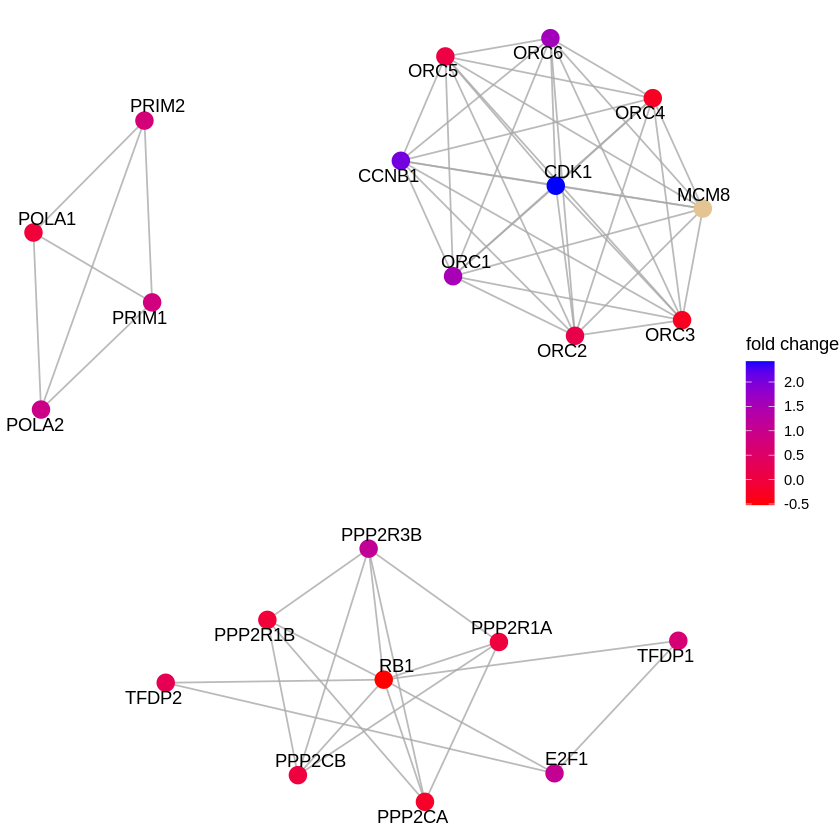

In [28]:
viewPathway("E2F mediated regulation of DNA replication",
            readable = TRUE,
            foldChange = geneList)